In [129]:
# pip install pandera

In [130]:
# In the original .csv there are some values outside the columns, so I need to remove them :facepalm:

In [131]:
import pandas as pd
import pandera as pa

In [132]:
cols = [
    'codigo_ocorrencia',
    'codigo_ocorrencia2',
    'ocorrencia_classificacao',
    'ocorrencia_cidade',
    'ocorrencia_uf',
    'ocorrencia_aerodromo',
    'ocorrencia_dia',
    'ocorrencia_hora',
    'total_recomendacoes'
]

na_values = ['**', '###!', '####', '****', '*****', 'NULL']

df = pd.read_csv("ocorrencia_2010_2020.csv", usecols=cols, na_values=na_values, error_bad_lines=False)

df = df[df['ocorrencia_dia'].str.contains(r"\d+/\d+/\d+", na=False)] # Should be na=True but :facepalm:
df = df[df['total_recomendacoes'].str.contains(r"\d+")]
df = df[df['ocorrencia_uf'].str.contains(r"[A-Z][A-Z]")]

# df.loc[df.ocorrencia_aerodromo == "****", ['ocorrencia_aerodromo']] = pd.NA

# df.fillna(value={ 'total_recomendacoes': 10 }, inplace=True)

df['ocorrencia_dia'] = pd.to_datetime(df.ocorrencia_dia, format='%d/%m/%Y')
df['total_recomendacoes'] = pd.to_numeric(df.total_recomendacoes)

df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5746,79769,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [80]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [81]:
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  0
ocorrencia_aerodromo        2342
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [82]:
schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia": pa.Column(pa.Int),
        "codigo_ocorrencia2": pa.Column(pa.Int),
        "ocorrencia_classificacao": pa.Column(pa.String),
        "ocorrencia_cidade": pa.Column(pa.String),
        "ocorrencia_uf": pa.Column(pa.String, pa.Check.str_length(2,2), nullable=True),
        "ocorrencia_aerodromo": pa.Column(pa.String, nullable=True),
        "ocorrencia_dia": pa.Column(pa.DateTime),
        "ocorrencia_hora": pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True),
        "total_recomendacoes": pa.Column(pa.Int)
    }
)
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5746,79769,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [83]:
df.ocorrencia_dia.dt.month

0        1
1        1
2        1
3        1
4        1
        ..
5746    12
5747    12
5748    12
5749    12
5750    12
Name: ocorrencia_dia, Length: 5739, dtype: int64

In [84]:
df.loc[1] # Label based

codigo_ocorrencia                         40349
codigo_ocorrencia2                        40349
ocorrencia_classificacao              INCIDENTE
ocorrencia_cidade                         BELÉM
ocorrencia_uf                                PA
ocorrencia_aerodromo                       SBBE
ocorrencia_dia              2010-01-03 00:00:00
ocorrencia_hora                        11:05:00
total_recomendacoes                           0
Name: 1, dtype: object

In [85]:
df.iloc[1] # Index based

codigo_ocorrencia                         40349
codigo_ocorrencia2                        40349
ocorrencia_classificacao              INCIDENTE
ocorrencia_cidade                         BELÉM
ocorrencia_uf                                PA
ocorrencia_aerodromo                       SBBE
ocorrencia_dia              2010-01-03 00:00:00
ocorrencia_hora                        11:05:00
total_recomendacoes                           0
Name: 1, dtype: object

In [86]:
df.loc[df.ocorrencia_hora.isnull()]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4100,78823,78823,INCIDENTE,CORUMBÁ,MS,NaN,2017-07-09,NaN,0


In [87]:
df.loc[df.total_recomendacoes > 10]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
63,39992,39992,ACIDENTE,SÃO PAULO,SP,SBMT,2010-02-17,20:07:00,11
326,42250,42250,ACIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-08-12,12:26:00,19
530,43471,43471,ACIDENTE,SÃO PAULO,SP,NaN,2010-12-14,20:15:00,11
727,44377,44377,ACIDENTE,ITÁPOLIS,SP,SDIO,2011-04-09,14:50:00,11
872,44796,44796,ACIDENTE,RECIFE,PE,SBRF,2011-07-13,09:54:00,23
884,44888,44888,INCIDENTE GRAVE,SÃO JOSÉ DOS PINHAIS,PR,SBCT,2011-07-15,17:05:00,11
1062,45554,45554,INCIDENTE GRAVE,UBERLÂNDIA,MG,SBUL,2011-11-15,02:15:00,20
1972,47938,47938,INCIDENTE,BRASÍLIA,DF,SBBR,2013-04-13,18:00:00,11
2795,52265,52265,ACIDENTE,SANTOS,SP,NaN,2014-08-13,13:03:00,13
3930,66432,66432,INCIDENTE GRAVE,VITÓRIA,ES,NaN,2017-02-21,11:47:00,12


In [88]:
df.loc[df.ocorrencia_classificacao == 'INCIDENTE GRAVE']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0
29,39709,39709,INCIDENTE GRAVE,CURITIBA,PR,SBBI,2010-01-23,16:36:00,2
35,39487,39487,INCIDENTE GRAVE,PALMAS,TO,SBPJ,2010-01-26,16:50:00,0
...,...,...,...,...,...,...,...,...,...
5741,79754,79754,INCIDENTE GRAVE,NOVA MARINGÁ,MT,NaN,2020-12-28,13:00:00,0
5744,79753,79753,INCIDENTE GRAVE,GOIATUBA,GO,NaN,2020-12-29,12:00:00,0
5746,79769,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0


In [89]:
filter1 = df.ocorrencia_classificacao == 'INCIDENTE GRAVE'
filter2 = df.ocorrencia_uf == 'SP'
df.loc[filter1 & filter2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
136,40270,40270,INCIDENTE GRAVE,PIRASSUNUNGA,SP,SDPY,2010-04-15,20:15:00,0
171,40620,40620,INCIDENTE GRAVE,GUARULHOS,SP,SBGR,2010-05-06,15:50:00,0
219,41411,41411,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2010-06-08,19:30:00,2
297,42289,42289,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2010-07-29,20:06:00,0
314,42323,42323,INCIDENTE GRAVE,SÃO JOSÉ DO RIO PRETO,SP,SBSR,2010-08-05,12:01:00,0
...,...,...,...,...,...,...,...,...,...
5591,79540,79540,INCIDENTE GRAVE,SÃO PAULO,SP,NaN,2020-09-12,13:10:00,0
5610,79566,79566,INCIDENTE GRAVE,REGENTE FEIJÓ,SP,SDYJ,2020-09-27,19:33:00,0
5704,79739,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0
5705,79705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0


In [90]:
filter1 = df.ocorrencia_classificacao == 'INCIDENTE GRAVE'
filter2 = df.ocorrencia_uf == 'SP'
df.loc[filter1 | filter2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8
16,39809,39809,INCIDENTE,SÃO PAULO,SP,NaN,2010-01-15,15:00:00,0
...,...,...,...,...,...,...,...,...,...
5744,79753,79753,INCIDENTE GRAVE,GOIATUBA,GO,NaN,2020-12-29,12:00:00,0
5746,79769,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0


In [91]:
filter1 = (df.ocorrencia_classificacao == 'INCIDENTE GRAVE') | (df.ocorrencia_classificacao == 'INCIDENTE')
filter2 = df.ocorrencia_uf == 'SP'
df.loc[filter1 & filter2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
16,39809,39809,INCIDENTE,SÃO PAULO,SP,NaN,2010-01-15,15:00:00,0
18,39828,39828,INCIDENTE,SANTOS,SP,NaN,2010-01-15,17:45:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,NaN,2010-01-20,13:10:00,0
27,39768,39768,INCIDENTE,CAMPINAS,SP,NaN,2010-01-21,20:45:00,0
33,39848,39848,INCIDENTE,GUARULHOS,SP,SBGR,2010-01-25,17:05:00,0
...,...,...,...,...,...,...,...,...,...
5704,79739,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0
5705,79705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0
5715,79718,79718,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2020-12-11,13:50:00,0
5742,79800,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0


In [92]:
filter1 = df.ocorrencia_classificacao.isin(['INCIDENTE GRAVE', 'INCIDENTE'])
filter2 = df.ocorrencia_uf == 'SP'
df.loc[filter1 & filter2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
16,39809,39809,INCIDENTE,SÃO PAULO,SP,NaN,2010-01-15,15:00:00,0
18,39828,39828,INCIDENTE,SANTOS,SP,NaN,2010-01-15,17:45:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,NaN,2010-01-20,13:10:00,0
27,39768,39768,INCIDENTE,CAMPINAS,SP,NaN,2010-01-21,20:45:00,0
33,39848,39848,INCIDENTE,GUARULHOS,SP,SBGR,2010-01-25,17:05:00,0
...,...,...,...,...,...,...,...,...,...
5704,79739,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0
5705,79705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0
5715,79718,79718,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2020-12-11,13:50:00,0
5742,79800,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0


In [93]:
df.loc[df.ocorrencia_cidade.str[0] == 'C']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
20,40310,40310,INCIDENTE,CRUZEIRO DO SUL,AC,SBCZ,2010-01-18,19:32:00,0
...,...,...,...,...,...,...,...,...,...
5661,79649,79649,INCIDENTE,CAMPINAS,SP,SBKP,2020-11-04,22:39:00,0
5663,79652,79652,INCIDENTE,CONFINS,MG,SBCF,2020-11-06,14:20:00,0
5680,79683,79683,INCIDENTE,CRUZEIRO DO SUL,AC,SBCZ,2020-11-16,22:00:00,0
5696,79692,79692,ACIDENTE,CATANDUVA,SP,SDCD,2020-11-28,12:50:00,0


In [94]:
df.loc[df.ocorrencia_cidade.str[-1] == 'A']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
12,40414,40414,INCIDENTE,BRASÍLIA,DF,SBBR,2010-01-10,03:00:00,0
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
25,39772,39772,INCIDENTE,UBERLÂNDIA,MG,NaN,2010-01-20,18:58:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,NaN,2010-01-20,13:10:00,0
...,...,...,...,...,...,...,...,...,...
5738,79787,79787,INCIDENTE,FORTALEZA,CE,SBFZ,2020-12-23,18:30:00,0
5739,79749,79749,ACIDENTE,MARITUBA,PA,NaN,2020-12-26,12:05:00,0
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5744,79753,79753,INCIDENTE GRAVE,GOIATUBA,GO,NaN,2020-12-29,12:00:00,0


In [95]:
df.loc[df.ocorrencia_dia.dt.year == 2015]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2996,52992,52992,INCIDENTE GRAVE,SALVADOR,BA,SBSV,2015-01-01,11:40:00,3
2997,52979,52979,ACIDENTE,IVINHEMA,MS,NaN,2015-01-02,14:50:00,0
2998,53073,53073,INCIDENTE,TEFÉ,AM,SBTF,2015-01-02,16:28:00,0
2999,53074,53074,INCIDENTE,BELO HORIZONTE,MG,SBBH,2015-01-02,20:34:00,0
3000,52976,52976,ACIDENTE,TOLEDO,PR,SBTD,2015-01-04,22:04:00,6
...,...,...,...,...,...,...,...,...,...
3462,60632,60632,INCIDENTE GRAVE,ITABERÁ,SP,NaN,2015-12-24,14:00:00,0
3463,60600,60600,INCIDENTE,GUARULHOS,SP,SBGR,2015-12-25,19:00:00,0
3464,60642,60642,INCIDENTE,SÃO FRANCISCO DO SUL,SC,SSSS,2015-12-26,16:00:00,0
3465,60631,60631,ACIDENTE,MAÇAMBARÁ,RS,NaN,2015-12-28,19:00:00,2


In [96]:
filter1 = df.ocorrencia_dia.dt.year == 2015
filter2 = df.ocorrencia_dia.dt.month == 12
filter3 = (df.ocorrencia_dia.dt.day >= 3) & (df.ocorrencia_dia.dt.day <= 8)
df.loc[filter1 & filter2 & filter3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3432,53575,53575,INCIDENTE,CAMPOS DOS GOYTACAZES,RJ,SBFS,2015-12-03,10:50:00,0
3433,60637,60637,INCIDENTE,BELO HORIZONTE,MG,SBBH,2015-12-03,16:47:00,0
3434,53625,53625,ACIDENTE,TRINDADE,GO,NaN,2015-12-06,13:10:00,3
3435,53626,53626,ACIDENTE,AMERICANA,SP,SDAI,2015-12-06,15:00:00,1
3436,53628,53628,ACIDENTE,AGUAÍ,SP,NaN,2015-12-08,14:30:00,1
3437,53629,53629,ACIDENTE,JALES,SP,SDJL,2015-12-08,10:20:00,0
3438,53631,53631,INCIDENTE,CAMPINAS,SP,SBKP,2015-12-08,16:19:00,0
3439,60636,60636,INCIDENTE,CAXIAS DO SUL,RS,SBCX,2015-12-08,13:00:00,0


In [97]:
df['ocorrencia_dia_hora'] = pd.to_datetime(df.ocorrencia_dia.astype(str) + ' ' + df.ocorrencia_hora)

In [98]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
ocorrencia_dia_hora         datetime64[ns]
dtype: object

In [99]:
filter1 = df.ocorrencia_dia_hora >= '2015-12-03 11:00:00'
filter2 = df.ocorrencia_dia_hora <= '2015-12-08 14:30:00'
df.loc[filter1 & filter2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,ocorrencia_dia_hora
3433,60637,60637,INCIDENTE,BELO HORIZONTE,MG,SBBH,2015-12-03,16:47:00,0,2015-12-03 16:47:00
3434,53625,53625,ACIDENTE,TRINDADE,GO,NaN,2015-12-06,13:10:00,3,2015-12-06 13:10:00
3435,53626,53626,ACIDENTE,AMERICANA,SP,SDAI,2015-12-06,15:00:00,1,2015-12-06 15:00:00
3436,53628,53628,ACIDENTE,AGUAÍ,SP,NaN,2015-12-08,14:30:00,1,2015-12-08 14:30:00
3437,53629,53629,ACIDENTE,JALES,SP,SDJL,2015-12-08,10:20:00,0,2015-12-08 10:20:00
3439,60636,60636,INCIDENTE,CAXIAS DO SUL,RS,SBCX,2015-12-08,13:00:00,0,2015-12-08 13:00:00


In [100]:
filter1 = df.ocorrencia_dia.dt.year == 2015
filter2 = df.ocorrencia_dia.dt.month == 3
df201503 = df.loc[filter1 & filter2]
df201503

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,ocorrencia_dia_hora
3086,53183,53183,ACIDENTE,AMAPORÃ,PR,NaN,2015-03-02,23:00:00,0,2015-03-02 23:00:00
3087,53120,53120,ACIDENTE,CHAVES,PA,SNXW,2015-03-04,13:30:00,0,2015-03-04 13:30:00
3088,53109,53109,ACIDENTE,CAMPO GRANDE,MS,SSIE,2015-03-05,13:50:00,0,2015-03-05 13:50:00
3089,53112,53112,ACIDENTE,MOGI GUAÇU,SP,NaN,2015-03-06,21:00:00,0,2015-03-06 21:00:00
3090,53152,53152,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,2015-03-10,11:30:00,2,2015-03-10 11:30:00
3091,53167,53167,INCIDENTE,MARABÁ,PA,SBMA,2015-03-10,17:33:00,0,2015-03-10 17:33:00
3092,53596,53596,INCIDENTE,ITAPEMA,SC,NaN,2015-03-10,21:35:00,0,2015-03-10 21:35:00
3093,53149,53149,ACIDENTE,TABATINGA,AM,SBTT,2015-03-11,23:25:00,0,2015-03-11 23:25:00
3094,53148,53148,ACIDENTE,ARARAS,SP,SDEH,2015-03-12,12:40:00,0,2015-03-12 12:40:00
3095,53153,53153,INCIDENTE,PORTO ALEGRE,RS,SBPA,2015-03-13,15:45:00,0,2015-03-13 15:45:00


In [101]:
df201503.count()

codigo_ocorrencia           37
codigo_ocorrencia2          37
ocorrencia_classificacao    37
ocorrencia_cidade           37
ocorrencia_uf               37
ocorrencia_aerodromo        21
ocorrencia_dia              37
ocorrencia_hora             37
total_recomendacoes         37
ocorrencia_dia_hora         37
dtype: int64

In [102]:
df201503.groupby(['ocorrencia_classificacao']).codigo_ocorrencia.count()

ocorrencia_classificacao
ACIDENTE           15
INCIDENTE          17
INCIDENTE GRAVE     5
Name: codigo_ocorrencia, dtype: int64

In [103]:
df201503.groupby(['ocorrencia_classificacao']).ocorrencia_aerodromo.count()

ocorrencia_classificacao
ACIDENTE            5
INCIDENTE          14
INCIDENTE GRAVE     2
Name: ocorrencia_aerodromo, dtype: int64

In [104]:
df201503.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE           15
INCIDENTE          17
INCIDENTE GRAVE     5
dtype: int64

In [105]:
df201503.groupby(['ocorrencia_classificacao']).size().sort_values()

ocorrencia_classificacao
INCIDENTE GRAVE     5
ACIDENTE           15
INCIDENTE          17
dtype: int64

In [106]:
df201503.groupby(['ocorrencia_classificacao']).size().sort_values(ascending=False)

ocorrencia_classificacao
INCIDENTE          17
ACIDENTE           15
INCIDENTE GRAVE     5
dtype: int64

In [109]:
filter1 = df.ocorrencia_dia.dt.year == 2010
filter2 = df.ocorrencia_uf.isin(['SP', 'MG', 'ES', 'RJ'])
dfsudeste2010 = df.loc[filter1 & filter2]
dfsudeste2010

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,ocorrencia_dia_hora
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0,2010-01-03 12:00:00
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,2010-01-03 03:00:00
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0,2010-01-10 20:00:00
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8,2010-01-10 14:50:00
16,39809,39809,INCIDENTE,SÃO PAULO,SP,NaN,2010-01-15,15:00:00,0,2010-01-15 15:00:00
...,...,...,...,...,...,...,...,...,...,...
541,43722,43722,ACIDENTE,CAJOBI,SP,NaN,2010-12-23,11:00:00,0,2010-12-23 11:00:00
544,43548,43548,INCIDENTE,SÃO PAULO,SP,SBSP,2010-12-26,22:10:00,0,2010-12-26 22:10:00
548,43724,43724,ACIDENTE,COSMÓPOLIS,SP,NaN,2010-12-29,12:00:00,0,2010-12-29 12:00:00
550,43730,43730,INCIDENTE,VITÓRIA,ES,NaN,2010-12-30,18:10:00,0,2010-12-30 18:10:00


In [110]:
dfsudeste2010.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE            40
INCIDENTE          170
INCIDENTE GRAVE     18
dtype: int64

In [112]:
dfsudeste2010.groupby(['ocorrencia_uf', 'ocorrencia_classificacao']).size()

ocorrencia_uf  ocorrencia_classificacao
ES             INCIDENTE                    5
MG             ACIDENTE                     7
               INCIDENTE                   39
               INCIDENTE GRAVE              5
RJ             ACIDENTE                     9
               INCIDENTE                   52
               INCIDENTE GRAVE              4
SP             ACIDENTE                    24
               INCIDENTE                   74
               INCIDENTE GRAVE              9
dtype: int64

In [114]:
dfsudeste2010.groupby(['ocorrencia_cidade']).size().sort_values(ascending=False)

ocorrencia_cidade
RIO DE JANEIRO           47
SÃO PAULO                33
GUARULHOS                18
BELO HORIZONTE           17
CAMPINAS                 13
MACAÉ                    12
CONFINS                   7
UBERLÂNDIA                5
JUIZ DE FORA              4
VITÓRIA                   4
MARÍLIA                   3
SÃO JOSÉ DOS CAMPOS       3
SÃO JOSÉ DO RIO PRETO     3
SOROCABA                  2
ITANHAÉM                  2
RIBEIRÃO PRETO            2
IPATINGA                  2
POÇOS DE CALDAS           2
DIVINÓPOLIS               2
BAURU                     2
JUNDIAÍ                   2
ARARAQUARA                2
CAMPOS DOS GOYTACAZES     2
AREALVA                   2
MONTES CLAROS             2
UBERABA                   2
POUSO ALEGRE              1
PIRACICABA                1
PIRASSUNUNGA              1
ARRAIAL DO CABO           1
RESENDE                   1
PENÁPOLIS                 1
SANTOS                    1
SERRA NEGRA               1
SÃO BERNARDO DO CAMPO     1
TI

In [121]:
filter = dfsudeste2010.total_recomendacoes > 0
dfsudeste2010.loc[filter].groupby(['ocorrencia_cidade']).total_recomendacoes.sum().sort_values(ascending=False)

ocorrencia_cidade
SÃO PAULO                41
RIO DE JANEIRO           25
BRAGANÇA PAULISTA         9
CAMANDUCAIA               9
RESENDE                   8
JUNDIAÍ                   7
IPERÓ                     3
NOVO HORIZONTE            3
TIMÓTEO                   3
BELO HORIZONTE            2
SÃO BERNARDO DO CAMPO     2
BOITUVA                   1
BOM JESUS DO GALHO        1
ITANHAÉM                  1
Name: total_recomendacoes, dtype: int64

In [122]:
filter = dfsudeste2010.total_recomendacoes > 0
dfsudeste2010.loc[filter].groupby(['ocorrencia_cidade', dfsudeste2010.ocorrencia_dia.dt.month]).total_recomendacoes.sum().sort_values(ascending=False)

ocorrencia_cidade      ocorrencia_dia
RIO DE JANEIRO         8                 19
SÃO PAULO              2                 14
                       12                11
BRAGANÇA PAULISTA      11                 9
CAMANDUCAIA            7                  9
RESENDE                4                  8
SÃO PAULO              1                  8
                       11                 6
JUNDIAÍ                5                  5
RIO DE JANEIRO         4                  3
                       7                  3
TIMÓTEO                2                  3
NOVO HORIZONTE         7                  3
IPERÓ                  1                  3
JUNDIAÍ                6                  2
SÃO BERNARDO DO CAMPO  1                  2
SÃO PAULO              6                  2
BELO HORIZONTE         3                  1
ITANHAÉM               9                  1
BOM JESUS DO GALHO     12                 1
BOITUVA                7                  1
BELO HORIZONTE         2              

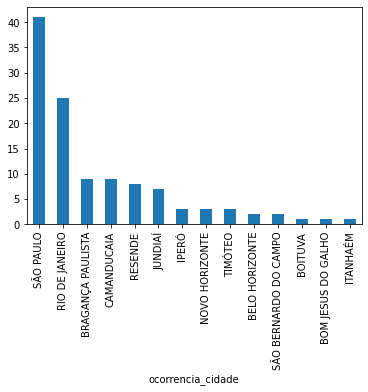

In [136]:
filter = dfsudeste2010.total_recomendacoes > 0
dfsudeste2010.loc[filter].groupby(['ocorrencia_cidade']).total_recomendacoes.sum().sort_values(ascending=False).plot.bar();

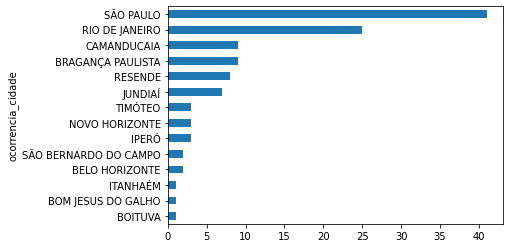

In [135]:
filter = dfsudeste2010.total_recomendacoes > 0
dfsudeste2010.loc[filter].groupby(['ocorrencia_cidade']).total_recomendacoes.sum().sort_values(ascending=True).plot.barh();

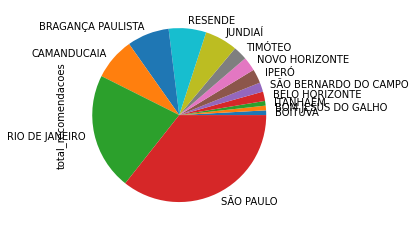

In [137]:
filter = dfsudeste2010.total_recomendacoes > 0
dfsudeste2010.loc[filter].groupby(['ocorrencia_cidade']).total_recomendacoes.sum().sort_values(ascending=True).plot.pie();

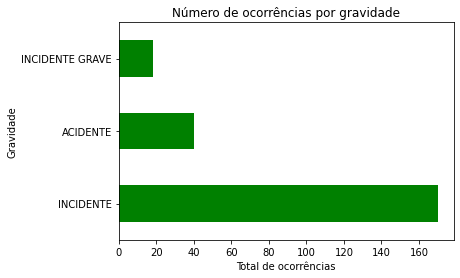

In [151]:
import matplotlib.pyplot as plt
dfsudeste2010['ocorrencia_classificacao'].value_counts().plot.barh(title='Número de ocorrências por gravidade', color='green')
plt.xlabel("Total de ocorrências")
plt.ylabel("Gravidade");

In [166]:
plt.style.use('ggplot')

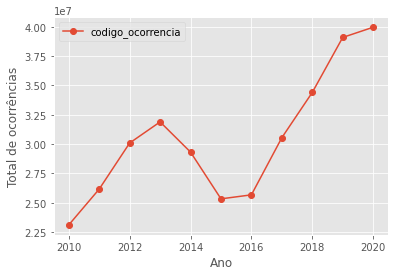

In [167]:
df.groupby(df.ocorrencia_dia.dt.year).codigo_ocorrencia.sum().plot(marker='o')
plt.xlabel("Ano")
plt.ylabel("Total de ocorrências")
plt.legend();

(array([552., 576., 647., 653., 565., 471., 403., 432., 441., 999.]),
 array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
        2019., 2020.]),
 <BarContainer object of 10 artists>)

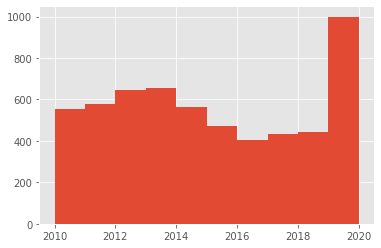

In [172]:
plt.hist(df["ocorrencia_dia"].dt.year)

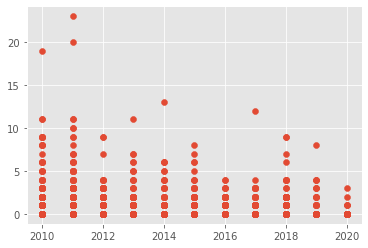

In [173]:
plt.scatter(x=df["ocorrencia_dia"].dt.year, y=df["total_recomendacoes"])

In [174]:
plt.style.use('seaborn')

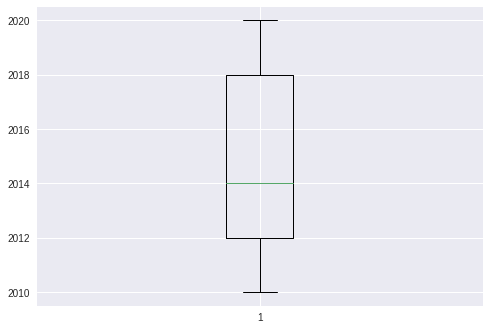

In [179]:
plt.boxplot(df["ocorrencia_dia"].dt.year);